Apply linear regression on “Mileage prediction” after implementing PCA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB
[[ 0.18946127 -0.52301889]
 [ 0.31000211 -0.84916407]
 [-3.38082107  1.30458096]
 [-2.14800195 -0.78936783]
 [-2.20853387  1.97233465]
 [ 1.09187172 -1.18753335]
 [ 2.47868813 -0.48796094]
 [-1.25181663 -0.21426728]
 [-0.16569314 -0.5026334 ]
 [ 1.8394626   0.14767   ]
 [ 0.40417009  0.70033624]
 [ 2.44888096  0.54354467]
 [-3.35603792  1.26703474]
 [-1.58080048 -0.26820927]
 [-0.62789394  0.41178075]
 [-2.24914949 -0.80949406]
 [-1.57381529 -0.27907015]
 [-2.58256555 -0.72504046]
 [-1.60288185 -1.52642722]
 [-0.63368948 -0.3693628 ]
 [ 0.30577022 -0.17592018]
 [ 3.30924418  1.34316

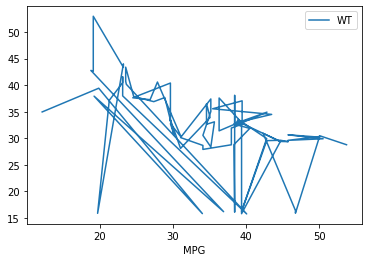

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Cars_mileage.csv')

df.describe()

df.head()

df.tail()

df.shape

df.columns

df.info()

df.isnull()

#missing_data =
df.isnull()
#missing_data.head(5)

df.plot('MPG','WT')

A = df.iloc[: , 0:80].values 
B = df.iloc[: , :].values

from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test= train_test_split(A,B, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
A_train = sc.fit_transform(A_train)
B_test = sc.transform(A_test)



from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
A_train = pca.fit_transform(A_train)
A_test = pca.transform(A_test)
#explained_variance = pca.explained_variance_ratio_

print(A_train,A_test)

from sklearn.linear_model import LinearRegression
cls = LinearRegression()
cls.fit( A_train,B_train)

cls = LinearRegression().fit(A_train,B_train)

R_square = cls.score(A_train,B_train)
print('Coefficient of determination :',R_square)

print('intersept:', cls.intercept_)
print('slope:', cls.coef_ )

new_cls = LinearRegression().fit(A_train, B_train)
print('intercept:', new_cls.intercept_)
print('slope:', new_cls.coef_ )

y_pred = cls.predict(A_train)
print('predicted response:', y_pred, sep= '\n')